In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler , MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score,roc_auc_score,confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split,GridSearchCV

In [41]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization, ReLU,Input,Dropout,Conv2D,MaxPooling2D,Flatten,Conv1D,MaxPooling1D, LeakyReLU, ELU

In [43]:
from scikeras.wrappers import KerasClassifier    #for scikit wrapper
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# Data Preprocessing 

In [45]:
df = pd.read_csv('Merged Data Angle Force (Last 20 stable).csv')
print(df.head(10))

   Thumb  Index  Middle  Ring  Pinky  Right Thumb [N]  Right Index [N]  \
0   20.0  102.0   132.0  74.0   59.0            0.290           -0.043   
1   22.0  102.0   132.0  74.0   59.0            0.284           -0.023   
2   22.0  102.0   132.0  74.0   59.0            0.294           -0.012   
3   22.0  104.0   133.0  74.0   59.0            0.284           -0.012   
4   21.0  103.0   134.0  74.0   59.0            0.288           -0.004   
5   22.0  103.0   134.0  74.0   59.0            0.288           -0.008   
6   22.0  102.0   132.0  74.0   59.0            0.290           -0.008   
7   22.0  103.0   130.0  74.0   59.0            0.195            0.059   
8   25.0  101.0   130.0  74.0   59.0            0.191           -0.008   
9   22.0  101.0   129.0  73.0   59.0            0.191            0.059   

   Right Middle [N]  Right Ring [N]  Right Pinky [N]             Object Grasp  \
0             0.141          -0.164            0.948  Skillet lid (T01)  Hook   
1             0.133    

In [46]:
newdf = df[['Thumb','Index','Middle','Ring','Pinky','Right Thumb [N]','Right Index [N]','Right Middle [N]','Right Ring [N]','Right Pinky [N]','Grasp','Object']]
newdf

,Thumb,Index,Middle,Ring,Pinky,Right Thumb [N],Right Index [N],Right Middle [N],Right Ring [N],Right Pinky [N],Grasp,Object
0,20.0,102.0,132.0,74.0,59.0,0.290,-0.043,0.141,-0.164,0.948,Hook,Skillet lid (T01)
1,22.0,102.0,132.0,74.0,59.0,0.284,-0.023,0.133,-0.176,0.944,Hook,Skillet lid (T01)
2,22.0,102.0,132.0,74.0,59.0,0.294,-0.012,0.145,-0.195,0.948,Hook,Skillet lid (T01)
3,22.0,104.0,133.0,74.0,59.0,0.284,-0.012,0.141,-0.199,0.940,Hook,Skillet lid (T01)
4,21.0,103.0,134.0,74.0,59.0,0.288,-0.004,0.156,-0.188,0.936,Hook,Skillet lid (T01)
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,23.0,37.0,35.0,29.0,12.0,1.800,4.720,0.070,0.080,0.060,Pulp Pinch (PP),Washer (T26)
4796,23.0,37.0,34.0,29.0,12.0,1.870,4.860,0.080,0.090,0.060,Pulp Pinch (PP),Washer (T26)
4797,22.0,37.0,35.0,30.0,12.0,1.770,3.760,0.080,0.090,0.060,Pulp Pinch (PP),Washer (T26)
4798,23.0,37.0,35.0,29.0,12.0,-0.050,0.080,0.050,0.080,0.070,Pulp Pinch (PP),Washer (T26)


In [47]:
newdf.Object.value_counts().size

24

In [48]:
grasp_object_counts = newdf.groupby(['Grasp', 'Object']).size()

# Display the result
print(grasp_object_counts)

Grasp                       Object                
 Diagonal Volar Grip (DVG)  Screwdriver (T06)         200
                            Skillet (T24)             200
                            Spatula (T15)             200
Cylindrical Grip (CG)       Chips Can (T05)           200
                            Coffee Can (T14)          200
                            Power Drill (T23)         200
Extension Grip (EG)         Craker Box (T13)          200
                            Plate (T04)               200
                            Tetra Pack (T22)          200
Hook                        Coffee Cup (T19)          200
                            Pitcher base (T10)        200
                            Skillet lid (T01)         200
Lateral Pinch (LP)          Bowl (T07)                200
                            Key (T25)                 200
                            XS Clamp (T16)            200
Pulp Pinch (PP)             Plastic Peer (T17)        200
                     

In [49]:
#test_objects = ['Spatula (T15)','Coffee Can (T14)','Tetra Pack (T22)','Skillet lid (T01)','Key (T25)','Small Marker (T08)','Mini Soccer ball (T11)','Large Marker (T03)']
#len(test_objects)

In [50]:
# print(newdf.shape)
# training_data = newdf[~newdf['Object'].isin(test_objects)]
# test_data = newdf[newdf['Object'].isin(test_objects)]
# print(training_data.shape)
# print(test_data.shape)

In [51]:
# trainy = training_data.Grasp
# trainx = training_data.drop("Grasp",axis='columns')
# testy = test_data.Grasp
# testx = test_data.drop("Grasp",axis='columns')
# print(trainx)
# print(trainy)

In [52]:
y= newdf.Grasp
x= newdf.drop("Grasp",axis='columns')
print(x)
print(y)
print(x.loc[2140:2150])
x.loc[2140, x.columns[:5]] = [26.0, 57, 75, 44, 30]
print(x.loc[2140:2150])
print(type(x))

      Thumb  Index  Middle  Ring  Pinky  Right Thumb [N]  Right Index [N]  \
0      20.0  102.0   132.0  74.0   59.0            0.290           -0.043   
1      22.0  102.0   132.0  74.0   59.0            0.284           -0.023   
2      22.0  102.0   132.0  74.0   59.0            0.294           -0.012   
3      22.0  104.0   133.0  74.0   59.0            0.284           -0.012   
4      21.0  103.0   134.0  74.0   59.0            0.288           -0.004   
...     ...    ...     ...   ...    ...              ...              ...   
4795   23.0   37.0    35.0  29.0   12.0            1.800            4.720   
4796   23.0   37.0    34.0  29.0   12.0            1.870            4.860   
4797   22.0   37.0    35.0  30.0   12.0            1.770            3.760   
4798   23.0   37.0    35.0  29.0   12.0           -0.050            0.080   
4799   23.0   40.0    35.0  29.0   13.0           -0.010            0.060   

      Right Middle [N]  Right Ring [N]  Right Pinky [N]             Object 

In [53]:
def preprocess_xy(x,y):
    x= x.drop("Object",axis='columns')
    frames = 20
    num_samples = (len(newdf))//frames
    x = x.values.reshape(num_samples, frames, x.shape[1])
    y=y.iloc[::frames]    #slicing y
    y = pd.get_dummies(y).to_numpy()
    trainx,testx,trainy,testy = train_test_split(x,y,random_state=0,test_size=0.3)
    re_trainx = trainx.reshape(trainx.shape[0]*trainx.shape[1],trainx.shape[2])
    #re_trainx.shape
    re_testx = testx.reshape(testx.shape[0]*testx.shape[1],testx.shape[2])
    #re_testx.shape
    scaler = MinMaxScaler()
    re_trainx = scaler.fit_transform(re_trainx)
    re_testx = scaler.transform(re_testx)
    trainx = re_trainx.reshape(-1, frames, trainx.shape[2])
    testx = re_testx.reshape(-1, frames, testx.shape[2])
    #trainx = trainx.reshape(trainx.shape[0],trainx.shape[1],trainx.shape[2],1)
    #testx = testx.reshape(testx.shape[0],testx.shape[1],testx.shape[2],1)
    #the input shape for CNNs typically expects a 4D tensor of shape (samples,height,width,channels)
    return trainx,testx,trainy,testy
trainx,testx,trainy,testy = preprocess_xy(x,y)

In [54]:
def process_xy(x,y):    #this has to be used for cross_validation scores
    x= x.drop("Object",axis='columns')
    x= x.values.reshape(240,20,10,1)
    #x= pd.DataFrame(x)
    y= y.iloc[::20]
    y = pd.get_dummies(y).to_numpy()
    return x,y
x,y = process_xy(x,y)

In [55]:
print(testy.shape)
print(trainx.shape)
print(type(testx))
print(type(trainy))

(72, 8)
(168, 20, 10)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [56]:
# def preprocess_xxtest(x,xtest):
#     scaler = StandardScaler()
#     x[numerical_cols] = scaler.fit_transform(x[numerical_cols])
#     xtest[numerical_cols] = scaler.transform(xtest[numerical_cols])
#     x = x.drop("Object",axis='columns')
#     xtest = xtest.drop("Object",axis='columns')
#     return x.to_numpy(),xtest.to_numpy()

# def preprocess_y(y):
#     return pd.get_dummies(y).to_numpy()

# def preprocess_xxtest_dl(x,xtest):
#     scaler = MinMaxScaler()      #only change is here. This scaler should not be used when there are outliers.
#     x[numerical_cols] = scaler.fit_transform(x[numerical_cols])
#     xtest[numerical_cols] = scaler.transform(xtest[numerical_cols])
#     x = x.drop("Object",axis='columns')
#     xtest = xtest.drop("Object",axis='columns')
#     return x.to_numpy(),xtest.to_numpy()


In [17]:
# from sklearn.preprocessing import LabelEncoder
# trainy_label = trainy
# testy_label = testy
# encode = LabelEncoder()
# trainy_label = encode.fit_transform(trainy_label)
# testy_label = encode.transform(testy_label)
# print(trainy_label)
# print(testy_label)

In [18]:
# dltrainx,dltestx = preprocess_xxtest_dl(trainx,testx)
# trainx,testx = preprocess_xxtest(trainx,testx)
# trainy_hot = preprocess_y(trainy)
# testy_hot = preprocess_y(testy)
# print(trainx)
# print(testx)

In [ ]:
# print(dltrainx)
# print(dltestx)
# print(trainy_hot)

# CNN

In [192]:
def cnn_model():
#     keras.Sequential([
#     layers.Input(shape=(28,28,1)),
#     layers.Conv2D(32,(3,3),activation='relu'),
#     layers.MaxPooling2D((2,2)),
#     layers.Dropout(0.25),
#     layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPooling2D((2, 2)),
#     layers.Dropout(0.25),
#     layers.Flatten(),
#     layers.Dense(64,activation='relu'),
#     layers.Dropout(0.25),
#     layers.Dense(10, activation='softmax')
    
    model = Sequential()
    model.add(Input(shape=(20,10,1)))   
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(64,activation='relu'))
    #model.add(ReLU())
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
    return model

In [195]:
cnn_final_model = cnn_model()
history = cnn_final_model.fit(trainx, trainy, validation_split = 0.1, epochs = 400, verbose = 1, batch_size=32)

Epoch 1/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.1101 - loss: 2.0778 - val_accuracy: 0.2941 - val_loss: 2.0373
Epoch 2/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1868 - loss: 2.0426 - val_accuracy: 0.2353 - val_loss: 1.9947
Epoch 3/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2173 - loss: 1.9952 - val_accuracy: 0.2941 - val_loss: 1.9466
Epoch 4/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2540 - loss: 1.9564 - val_accuracy: 0.4118 - val_loss: 1.8936
Epoch 5/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2554 - loss: 1.9136 - val_accuracy: 0.3529 - val_loss: 1.8218
Epoch 6/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2773 - loss: 1.8374 - val_accuracy: 0.3529 - val_loss: 1.7514
Epoch 7/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3344 - loss: 1.7197 - val_accuracy: 0.3529 - val_loss: 1.6681
Epoch 8/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3597 - loss: 1.6124 - val_accuracy: 0.2353 - val_loss:

Epoch 52/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9531 - loss: 0.1665 - val_accuracy: 1.0000 - val_loss: 0.1865
Epoch 53/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9455 - loss: 0.2151 - val_accuracy: 0.8824 - val_loss: 0.2767
Epoch 54/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9376 - loss: 0.2259 - val_accuracy: 0.8824 - val_loss: 0.2065
Epoch 55/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9554 - loss: 0.1903 - val_accuracy: 1.0000 - val_loss: 0.1662
Epoch 56/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9427 - loss: 0.2168 - val_accuracy: 0.8824 - val_loss: 0.2565
Epoch 57/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9594 - loss: 0.1882 - val_accuracy: 1.0000 - val_loss: 0.1624
Epoch 58/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9370 - loss: 0.1495 - val_accuracy: 0.9412 - val_loss: 0.1950
Epoch 59/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9067 - loss: 0.2043 - val_accuracy: 0.9412 - v

Epoch 103/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9538 - loss: 0.0828 - val_accuracy: 0.9412 - val_loss: 0.1161
Epoch 104/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9869 - loss: 0.0616 - val_accuracy: 0.9412 - val_loss: 0.0858
Epoch 105/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9703 - loss: 0.0762 - val_accuracy: 1.0000 - val_loss: 0.1051
Epoch 106/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9948 - loss: 0.0592 - val_accuracy: 0.9412 - val_loss: 0.1339
Epoch 107/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9834 - loss: 0.0708 - val_accuracy: 1.0000 - val_loss: 0.0877
Epoch 108/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9834 - loss: 0.0741 - val_accuracy: 1.0000 - val_loss: 0.0903
Epoch 109/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9922 - loss: 0.0613 - val_accuracy: 1.0000 - val_loss: 0.0650
Epoch 110/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9817 - loss: 0.0642 - val_accuracy: 1.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9922 - loss: 0.0218 - val_accuracy: 0.9412 - val_loss: 0.0634
Epoch 204/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9843 - loss: 0.0208 - val_accuracy: 1.0000 - val_loss: 0.0480
Epoch 205/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0095 - val_accuracy: 1.0000 - val_loss: 0.0424
Epoch 206/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9978 - loss: 0.0114 - val_accuracy: 1.0000 - val_loss: 0.0514
Epoch 207/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9978 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 0.0499
Epoch 208/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9869 - loss: 0.0346 - val_accuracy: 0.9412 - val_loss: 0.0772
Epoch 209/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9965 - loss: 0.0250 - val_accuracy: 1.0000 - val_loss: 0.0354
Epoch 210/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9948 - loss: 0.0143 - val_accuracy: 1.0000 - val_los

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0072 - val_accuracy: 0.9412 - val_loss: 0.0715
Epoch 304/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.9412 - val_loss: 0.0680
Epoch 305/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0432
Epoch 306/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0387
Epoch 307/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9922 - loss: 0.0201 - val_accuracy: 0.9412 - val_loss: 0.1073
Epoch 308/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 1.0000 - val_loss: 0.0623
Epoch 309/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0544
Epoch 310/400
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.9412 - val_los

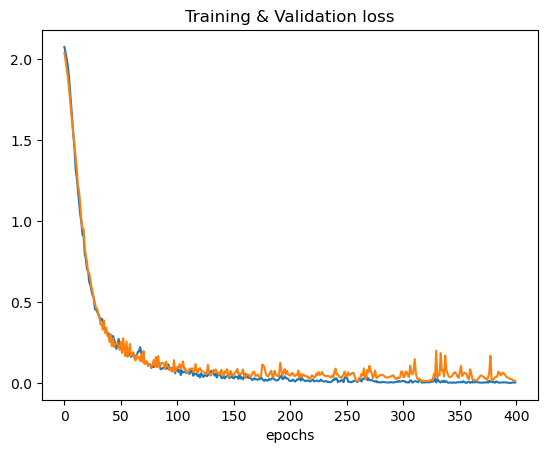

batch_size = 32


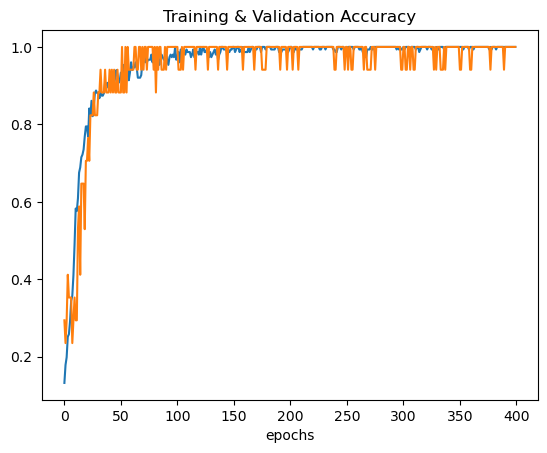

In [196]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation loss')
plt.xlabel('epochs')
plt.show()
print("batch_size = 32")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('epochs')
plt.show()
#orange is validation

In [197]:
# Assuming you have your trained model 'dl_final_model' and evaluation data 'X_eval' and 'y_eval'
loss, accuracy = cnn_final_model.evaluate(testx, testy, verbose=1)

print(f"Evaluation Loss: {loss}")
print(f"Evaluation Accuracy: {accuracy}")

# best_epoch = np.argmax(history.history['val_accuracy'])
# best_accuracy = history.history['val_accuracy'][best_epoch]
# print(f"Best epoch: {best_epoch}")
# print(f"Best validation accuracy: {best_accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9635 - loss: 0.1932 
Evaluation Loss: 0.19974277913570404
Evaluation Accuracy: 0.9583333134651184


In [198]:
cnn_model_wrapped = KerasClassifier(model = cnn_model, epochs = 300, batch_size = 32, verbose = 1)  #for scikit-learn wrapper
kfold = KFold(n_splits = 5, shuffle = True)
results = cross_val_score(cnn_model_wrapped, trainx, trainy, cv = kfold) #will only work if the estimator model is wrapped in scikit-learn 
#this basically trains our model five times with different validation sets (taken like in cv=5)
#then averaging the accuracy we get for the 5 validation sets to get the final accuracy and std.
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1313 - loss: 2.0510
Epoch 2/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1606 - loss: 2.0093 
Epoch 3/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1832 - loss: 1.9387 
Epoch 4/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2222 - loss: 1.9145 
Epoch 5/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2602 - loss: 1.8719 
Epoch 6/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2304 - loss: 1.8158 
Epoch 7/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3136 - loss: 1.7310 
Epoch 8/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2660 - loss: 1.7118 
Epoch 9/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3923 - loss: 1.5918 
Epoch 10/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3005 - loss: 1.5669 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3628 - loss: 1.5275 
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3123 - loss

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9675 - loss: 0.1033 
Epoch 138/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9438 - loss: 0.1372 
Epoch 139/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.0794 
Epoch 140/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9663 - loss: 0.1022 
Epoch 141/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9723 - loss: 0.0980 
Epoch 142/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9649 - loss: 0.0989 
Epoch 143/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9495 - loss: 0.1236 
Epoch 144/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9631 - loss: 0.1166 
Epoch 145/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0680 
Epoch 146/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0831 
Epoch 147/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9475 - loss: 0.1084 
Epoch 148/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.971

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0186 
Epoch 274/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.0262 
Epoch 275/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0193 
Epoch 276/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0173 
Epoch 277/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9945 - loss: 0.0215 
Epoch 278/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9919 - loss: 0.0245 
Epoch 279/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0113 
Epoch 280/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0226 
Epoch 281/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0156 
Epoch 282/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0352 
Epoch 283/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9962 - loss: 0.0183 
Epoch 284/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.000

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9692 - loss: 0.1228 
Epoch 110/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9460 - loss: 0.1238 
Epoch 111/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9692 - loss: 0.0882 
Epoch 112/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0717 
Epoch 113/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.0785 
Epoch 114/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9881 - loss: 0.0885 
Epoch 115/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9863 - loss: 0.0549 
Epoch 116/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9924 - loss: 0.0630 
Epoch 117/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.0638 
Epoch 118/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9685 - loss: 0.0753 
Epoch 119/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9431 - loss: 0.1413 
Epoch 120/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.974

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0062 
Epoch 246/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0070 
Epoch 247/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9962 - loss: 0.0193 
Epoch 248/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0105 
Epoch 249/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0106 
Epoch 250/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0098 
Epoch 251/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0152 
Epoch 252/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0073 
Epoch 253/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9945 - loss: 0.0220 
Epoch 254/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9863 - loss: 0.0335 
Epoch 255/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0128 
Epoch 256/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.000

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9304 - loss: 0.2054 
Epoch 81/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.2001 
Epoch 82/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8915 - loss: 0.2731 
Epoch 83/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9426 - loss: 0.2067 
Epoch 84/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9205 - loss: 0.2202 
Epoch 85/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9382 - loss: 0.1778 
Epoch 86/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9037 - loss: 0.2354 
Epoch 87/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8958 - loss: 0.2258 
Epoch 88/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9225 - loss: 0.2042 
Epoch 89/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9622 - loss: 0.1617 
Epoch 90/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9773 - loss: 0.1544 
Epoch 91/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0416 
Epoch 217/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0249 
Epoch 218/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0391 
Epoch 219/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9962 - loss: 0.0219 
Epoch 220/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0316 
Epoch 221/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0412 
Epoch 222/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0246 
Epoch 223/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0334 
Epoch 224/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9962 - loss: 0.0300 
Epoch 225/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0210 
Epoch 226/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0331 
Epoch 227/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.000

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8496 - loss: 0.5138 
Epoch 40/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7944 - loss: 0.5653 
Epoch 41/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8472 - loss: 0.5020 
Epoch 42/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8757 - loss: 0.4441 
Epoch 43/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8717 - loss: 0.4778 
Epoch 44/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8934 - loss: 0.4233 
Epoch 45/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9038 - loss: 0.4110 
Epoch 46/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9215 - loss: 0.4097 
Epoch 47/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8793 - loss: 0.4371 
Epoch 48/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8715 - loss: 0.4085 
Epoch 49/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9139 - loss: 0.3719 
Epoch 50/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8994 - loss: 0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0306 
Epoch 176/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9867 - loss: 0.0447 
Epoch 177/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9945 - loss: 0.0459 
Epoch 178/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.0390 
Epoch 179/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.0356 
Epoch 180/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9919 - loss: 0.0341 
Epoch 181/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9962 - loss: 0.0395 
Epoch 182/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9734 - loss: 0.0821 
Epoch 183/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0305 
Epoch 184/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9734 - loss: 0.0495 
Epoch 185/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9962 - loss: 0.0436 
Epoch 186/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.991

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3795 - loss: 1.5226 
Epoch 11/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4009 - loss: 1.4607 
Epoch 12/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4333 - loss: 1.4409 
Epoch 13/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4623 - loss: 1.3273 
Epoch 14/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4452 - loss: 1.3307 
Epoch 15/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5095 - loss: 1.2538 
Epoch 16/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5547 - loss: 1.1680 
Epoch 17/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5457 - loss: 1.1945 
Epoch 18/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5273 - loss: 1.1788 
Epoch 19/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5311 - loss: 1.1100 
Epoch 20/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6137 - loss: 1.0611 
Epoch 21/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6178 - loss: 1

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9534 - loss: 0.0854 
Epoch 147/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9745 - loss: 0.1112 
Epoch 148/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9907 - loss: 0.0778 
Epoch 149/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9757 - loss: 0.0781 
Epoch 150/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9907 - loss: 0.0468 
Epoch 151/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9457 - loss: 0.1030 
Epoch 152/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9938 - loss: 0.0557 
Epoch 153/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9881 - loss: 0.0564 
Epoch 154/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9542 - loss: 0.1067 
Epoch 155/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0839 
Epoch 156/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9548 - loss: 0.1017 
Epoch 157/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.987

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0160 
Epoch 283/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0216 
Epoch 284/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0176 
Epoch 285/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0131 
Epoch 286/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0107 
Epoch 287/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9945 - loss: 0.0129 
Epoch 288/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0071 
Epoch 289/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9881 - loss: 0.0293 
Epoch 290/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0130 
Epoch 291/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9919 - loss: 0.0381 
Epoch 292/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9975 - loss: 0.0234 
Epoch 293/300
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.996

# CONV 1D

In [57]:
def cnn_model(conv_activation=ReLU(),conv_filters=[64,128],conv_kernels=[3,3],pooling=True,conv_d=0.1
             ,dense_units=[64],dense_activation=ReLU(),dense_d=0):
    model = Sequential()
    model.add(Input(shape=(20,10)))   
    
    for i in range(len(conv_filters)):
        model.add(Conv1D(conv_filters[i],kernel_size=conv_kernels[i]))
        model.add(conv_activation)
        model.add(BatchNormalization())
        if(pooling):
            model.add(MaxPooling1D(2))
        model.add(Dropout(conv_d))
    
    model.add(Flatten())
    
    for i in range(len(dense_units)):
        model.add(Dense(dense_units[i]))
        model.add(BatchNormalization())
        model.add(dense_activation)
        model.add(Dropout(dense_d))
        
    model.add(Dense(8, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
    return model

In [67]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=150,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
    verbose = 1
)

cnn_final_model = cnn_model(conv_filters=[32,64],dense_units=[64],pooling=False,conv_d=0.3,dense_d=0.4)
history = cnn_final_model.fit(trainx, trainy, validation_data=(testx,testy), epochs = 400, verbose = 1, batch_size=32, callbacks=[early_stopping])

Epoch 1/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.1228 - loss: 2.5146 - val_accuracy: 0.2778 - val_loss: 2.0353
Epoch 2/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3749 - loss: 1.7036 - val_accuracy: 0.2639 - val_loss: 2.0060
Epoch 3/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5165 - loss: 1.3619 - val_accuracy: 0.2778 - val_loss: 1.9844
Epoch 4/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5743 - loss: 1.1684 - val_accuracy: 0.3194 - val_loss: 1.9627
Epoch 5/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6583 - loss: 0.9771 - val_accuracy: 0.3472 - val_loss: 1.9442
Epoch 6/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7441 - loss: 0.8067 - val_accuracy: 0.3472 - val_loss: 1.9281
Epoch 7/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7605 - loss: 0.7919 - val_accuracy: 0.3472 - val_loss: 1.9157
Epoch 8/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7853 - loss: 0.7721 - val_accuracy: 0.3472 - val_loss:

Epoch 52/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9805 - loss: 0.1458 - val_accuracy: 0.6111 - val_loss: 0.9386
Epoch 53/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9692 - loss: 0.1459 - val_accuracy: 0.6250 - val_loss: 0.9189
Epoch 54/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9822 - loss: 0.1463 - val_accuracy: 0.6528 - val_loss: 0.8858
Epoch 55/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9790 - loss: 0.1311 - val_accuracy: 0.7083 - val_loss: 0.8216
Epoch 56/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9638 - loss: 0.1745 - val_accuracy: 0.6944 - val_loss: 0.7770
Epoch 57/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9842 - loss: 0.1109 - val_accuracy: 0.6806 - val_loss: 0.7685
Epoch 58/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9983 - loss: 0.0955 - val_accuracy: 0.6944 - val_loss: 0.7769
Epoch 59/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9892 - loss: 0.1065 - val_accuracy: 0.6944 - v

Epoch 103/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9762 - loss: 0.0766 - val_accuracy: 0.9444 - val_loss: 0.1766
Epoch 104/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9807 - loss: 0.0675 - val_accuracy: 0.9583 - val_loss: 0.1648
Epoch 105/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0509 - val_accuracy: 0.9444 - val_loss: 0.1504
Epoch 106/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9874 - loss: 0.0452 - val_accuracy: 0.9306 - val_loss: 0.1411
Epoch 107/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9974 - loss: 0.0601 - val_accuracy: 0.9444 - val_loss: 0.1340
Epoch 108/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9881 - loss: 0.0662 - val_accuracy: 0.9722 - val_loss: 0.1183
Epoch 109/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9827 - loss: 0.0657 - val_accuracy: 0.9583 - val_loss: 0.1271
Epoch 110/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9937 - loss: 0.0765 - val_accuracy: 0.

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9983 - loss: 0.0383 - val_accuracy: 0.9722 - val_loss: 0.1000
Epoch 154/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9948 - loss: 0.0441 - val_accuracy: 0.9444 - val_loss: 0.2145
Epoch 155/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9983 - loss: 0.0383 - val_accuracy: 0.9306 - val_loss: 0.2497
Epoch 156/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9948 - loss: 0.0433 - val_accuracy: 0.9306 - val_loss: 0.1435
Epoch 157/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9931 - loss: 0.0388 - val_accuracy: 0.9444 - val_loss: 0.1319
Epoch 158/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9872 - loss: 0.0693 - val_accuracy: 0.9444 - val_loss: 0.1488
Epoch 159/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9922 - loss: 0.0466 - val_accuracy: 0.9028 - val_loss: 0.2711
Epoch 160/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9892 - loss: 0.0579 - val_accuracy: 0.9028 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0186 - val_accuracy: 0.9028 - val_loss: 0.2466
Epoch 204/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9708 - loss: 0.0662 - val_accuracy: 0.8889 - val_loss: 0.2932
Epoch 205/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9963 - loss: 0.0337 - val_accuracy: 0.8889 - val_loss: 0.4429
Epoch 206/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9868 - loss: 0.0676 - val_accuracy: 0.8889 - val_loss: 0.5099
Epoch 207/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9807 - loss: 0.0826 - val_accuracy: 0.8750 - val_loss: 0.4526
Epoch 208/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9805 - loss: 0.0606 - val_accuracy: 0.9167 - val_loss: 0.3241
Epoch 209/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9753 - loss: 0.0806 - val_accuracy: 0.9167 - val_loss: 0.2567
Epoch 210/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9502 - loss: 0.1012 - val_accuracy: 0.9306 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9983 - loss: 0.0264 - val_accuracy: 0.9583 - val_loss: 0.1732
Epoch 254/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.9306 - val_loss: 0.2887
Epoch 255/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9851 - loss: 0.0731 - val_accuracy: 0.9306 - val_loss: 0.2532
Epoch 256/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9881 - loss: 0.0474 - val_accuracy: 0.9583 - val_loss: 0.1770
Epoch 257/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0283 - val_accuracy: 0.9444 - val_loss: 0.1522
Epoch 258/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9920 - loss: 0.0311 - val_accuracy: 0.9444 - val_loss: 0.1432
Epoch 259/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9762 - loss: 0.0526 - val_accuracy: 0.9583 - val_loss: 0.1267
Epoch 260/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0165 - val_accuracy: 0.9722 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9926 - loss: 0.0273 - val_accuracy: 0.9444 - val_loss: 0.2277
Epoch 304/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9957 - loss: 0.0244 - val_accuracy: 0.9306 - val_loss: 0.2029
Epoch 305/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9931 - loss: 0.0265 - val_accuracy: 0.9444 - val_loss: 0.1829
Epoch 306/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9948 - loss: 0.0278 - val_accuracy: 0.9444 - val_loss: 0.2144
Epoch 307/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9946 - loss: 0.0344 - val_accuracy: 0.9583 - val_loss: 0.1996
Epoch 308/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9949 - loss: 0.0341 - val_accuracy: 0.9167 - val_loss: 0.1868
Epoch 309/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9881 - loss: 0.0411 - val_accuracy: 0.9028 - val_loss: 0.1919
Epoch 310/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9926 - loss: 0.0462 - val_accuracy: 0.8889 - val_los

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9937 - loss: 0.0299 - val_accuracy: 0.9306 - val_loss: 0.2367
Epoch 354/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0250 - val_accuracy: 0.9306 - val_loss: 0.2660
Epoch 355/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9699 - loss: 0.0647 - val_accuracy: 0.9583 - val_loss: 0.1311
Epoch 356/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9983 - loss: 0.0121 - val_accuracy: 0.9583 - val_loss: 0.1000
Epoch 357/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 1.0000 - loss: 0.0149 - val_accuracy: 0.9583 - val_loss: 0.0812
Epoch 358/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9926 - loss: 0.0150 - val_accuracy: 0.9722 - val_loss: 0.0944
Epoch 359/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 1.0000 - loss: 0.0082 - val_accuracy: 0.9583 - val_loss: 0.1320
Epoch 360/400
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9909 - loss: 0.0281 - val_accuracy: 0.9583 - val_los

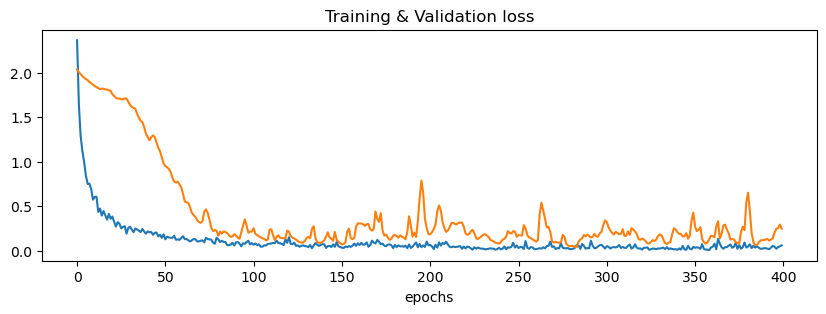

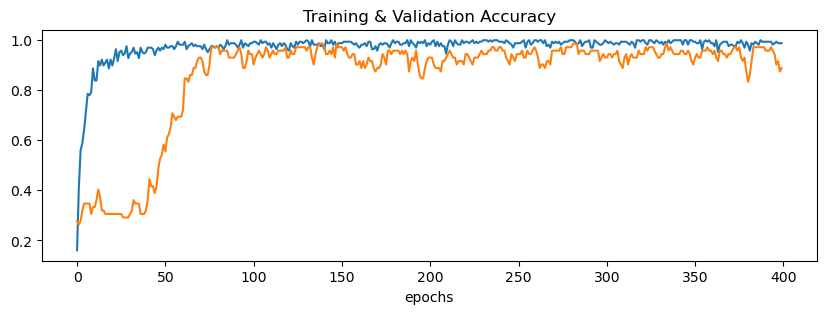

In [68]:
plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training & Validation loss')
plt.xlabel('epochs')
plt.show()
#print("batch_size = 32")
plt.figure(figsize=(10, 3))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('epochs')
plt.show()
#orange is validation

In [69]:
# Assuming you have your trained model 'dl_final_model' and evaluation data 'X_eval' and 'y_eval'
loss, accuracy = cnn_final_model.evaluate(testx, testy, verbose=1)

print(f"Evaluation Loss: {loss}")
print(f"Evaluation Accuracy: {accuracy}")

# best_epoch = np.argmax(history.history['val_accuracy'])
# best_accuracy = history.history['val_accuracy'][best_epoch]
# print(f"Best epoch: {best_epoch}")
# print(f"Best validation accuracy: {best_accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9931 - loss: 0.0372 
Evaluation Loss: 0.04415707290172577
Evaluation Accuracy: 0.9861111044883728


In [70]:
cnn_model_wrapped = KerasClassifier(model = cnn_model,conv_filters=[32,64],dense_units=[64],pooling=False,conv_d=0.3,dense_d=0.4, epochs = 350, batch_size = 32, verbose = 1)  #for scikit-learn wrapper
kfold = KFold(n_splits = 5, shuffle = True)
results = cross_val_score(cnn_model_wrapped, x, y, cv = kfold) #will only work if the estimator model is wrapped in scikit-learn 
#this basically trains our model five times with different validation sets (taken like in cv=5)
#then averaging the accuracy we get for the 5 validation sets to get the final accuracy and std.
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1746 - loss: 2.3945
Epoch 2/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4414 - loss: 1.4950 
Epoch 3/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5911 - loss: 1.1588 
Epoch 4/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6735 - loss: 1.0467 
Epoch 5/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7601 - loss: 0.8829 
Epoch 6/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7479 - loss: 0.8058 
Epoch 7/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7845 - loss: 0.7794 
Epoch 8/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8048 - loss: 0.7521 
Epoch 9/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8263 - loss: 0.6205 
Epoch 10/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7321 - loss: 0.7848 
Epoch 11/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8434 - loss: 0.5641 
Epoch 12/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7612 - loss

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9459 - loss: 0.1452 
Epoch 70/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9534 - loss: 0.1314 
Epoch 71/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9585 - loss: 0.1735 
Epoch 72/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9690 - loss: 0.1240 
Epoch 73/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.1141 
Epoch 74/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0832 
Epoch 75/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.1246 
Epoch 76/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9807 - loss: 0.1176 
Epoch 77/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.1604 
Epoch 78/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9760 - loss: 0.0981 
Epoch 79/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0971 
Epoch 80/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9652 - loss: 0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9453 - loss: 0.1440 
Epoch 138/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9764 - loss: 0.0936 
Epoch 139/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9859 - loss: 0.0741 
Epoch 140/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9789 - loss: 0.0775 
Epoch 141/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - loss: 0.1070 
Epoch 142/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0413 
Epoch 143/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9941 - loss: 0.0389 
Epoch 144/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0250 
Epoch 145/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9783 - loss: 0.0768 
Epoch 146/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.0847 
Epoch 147/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9562 - loss: 0.1515 
Epoch 148/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.974

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9961 - loss: 0.0240 
Epoch 206/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9772 - loss: 0.0499 
Epoch 207/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0335 
Epoch 208/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.0355 
Epoch 209/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0417 
Epoch 210/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0400 
Epoch 211/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0177 
Epoch 212/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0477 
Epoch 213/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0253 
Epoch 214/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9694 - loss: 0.0433 
Epoch 215/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9811 - loss: 0.0679 
Epoch 216/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.000

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0160 
Epoch 274/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0113 
Epoch 275/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9926 - loss: 0.0189 
Epoch 276/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9854 - loss: 0.0458 
Epoch 277/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0293 
Epoch 278/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0382 
Epoch 279/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9728 - loss: 0.0432 
Epoch 280/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9950 - loss: 0.0344 
Epoch 281/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9878 - loss: 0.0429
Epoch 282/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0438 
Epoch 283/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9915 - loss: 0.0356 
Epoch 284/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0044 
Epoch 342/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0133 
Epoch 343/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9776 - loss: 0.0393 
Epoch 344/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0376 
Epoch 345/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9965 - loss: 0.0090 
Epoch 346/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0327 
Epoch 347/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.0215 
Epoch 348/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 0.0548 
Epoch 349/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0186 
Epoch 350/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9950 - loss: 0.0379 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Epoch 1/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1472 - loss: 2.6211   
Epoch 2/350
6/6 ━━━━━━━━━━━━━━

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9613 - loss: 0.1501 
Epoch 60/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.1944 
Epoch 61/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9732 - loss: 0.1649 
Epoch 62/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9418 - loss: 0.1585
Epoch 63/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9686 - loss: 0.1428 
Epoch 64/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9458 - loss: 0.1617 
Epoch 65/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9699 - loss: 0.1542 
Epoch 66/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9565 - loss: 0.1610 
Epoch 67/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9339 - loss: 0.2020 
Epoch 68/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9772 - loss: 0.1272
Epoch 69/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9571 - loss: 0.1530 
Epoch 70/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.1

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9842 - loss: 0.0697 
Epoch 128/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0493 
Epoch 129/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0868 
Epoch 130/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9535 - loss: 0.1419 
Epoch 131/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0467 
Epoch 132/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0598 
Epoch 133/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.1279 
Epoch 134/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0787 
Epoch 135/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9661 - loss: 0.0849 
Epoch 136/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1151 
Epoch 137/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9926 - loss: 0.0641 
Epoch 138/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.994

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0255 
Epoch 196/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9749 - loss: 0.0482 
Epoch 197/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0439 
Epoch 198/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9810 - loss: 0.0584 
Epoch 199/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9796 - loss: 0.0732 
Epoch 200/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0834 
Epoch 201/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0284 
Epoch 202/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9893 - loss: 0.0533 
Epoch 203/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0594 
Epoch 204/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0372 
Epoch 205/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9859 - loss: 0.0580 
Epoch 206/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.978

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0306 
Epoch 264/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0254 
Epoch 265/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0094 
Epoch 266/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0244 
Epoch 267/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9775 - loss: 0.0487 
Epoch 268/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9876 - loss: 0.0596 
Epoch 269/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9787 - loss: 0.0324 
Epoch 270/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0309 
Epoch 271/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0236 
Epoch 272/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9702 - loss: 0.0716 
Epoch 273/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0176 
Epoch 274/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.995

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0293 
Epoch 332/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0409 
Epoch 333/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0210 
Epoch 334/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0251 
Epoch 335/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0181 
Epoch 336/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0104 
Epoch 337/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9815 - loss: 0.0428 
Epoch 338/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9889 - loss: 0.0400 
Epoch 339/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9868 - loss: 0.0384 
Epoch 340/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9869 - loss: 0.0233 
Epoch 341/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0177 
Epoch 342/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.981

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9379 - loss: 0.2481 
Epoch 50/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9306 - loss: 0.2103 
Epoch 51/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9487 - loss: 0.1956 
Epoch 52/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9636 - loss: 0.1674 
Epoch 53/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9497 - loss: 0.1810 
Epoch 54/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9734 - loss: 0.1337 
Epoch 55/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9555 - loss: 0.1636 
Epoch 56/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9569 - loss: 0.1298 
Epoch 57/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9788 - loss: 0.1436 
Epoch 58/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.1365 
Epoch 59/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9382 - loss: 0.1579 
Epoch 60/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0844 
Epoch 118/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0501 
Epoch 119/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9780 - loss: 0.0961 
Epoch 120/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 0.0690 
Epoch 121/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1203 
Epoch 122/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865 - loss: 0.0819 
Epoch 123/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9702 - loss: 0.0753 
Epoch 124/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0539 
Epoch 125/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9766 - loss: 0.0790 
Epoch 126/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0835 
Epoch 127/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9845 - loss: 0.0691 
Epoch 128/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.969

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0378 
Epoch 186/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9772 - loss: 0.0504 
Epoch 187/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0482
Epoch 188/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9737 - loss: 0.0803 
Epoch 189/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0316 
Epoch 190/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9880 - loss: 0.0332 
Epoch 191/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9889 - loss: 0.0383 
Epoch 192/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0325 
Epoch 193/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9985 - loss: 0.0350 
Epoch 194/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9813 - loss: 0.0410 
Epoch 195/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0474 
Epoch 196/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9865

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0200 
Epoch 254/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9913 - loss: 0.0259 
Epoch 255/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0187 
Epoch 256/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0428 
Epoch 257/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0306 
Epoch 258/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0186 
Epoch 259/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9893 - loss: 0.0378 
Epoch 260/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0173 
Epoch 261/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.0596 
Epoch 262/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0356 
Epoch 263/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0126 
Epoch 264/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.985

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0128 
Epoch 322/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0196 
Epoch 323/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0105 
Epoch 324/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9848 - loss: 0.0315
Epoch 325/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0313 
Epoch 326/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9828 - loss: 0.0688 
Epoch 327/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0175 
Epoch 328/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0408 
Epoch 329/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0258 
Epoch 330/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0145 
Epoch 331/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 1.0000 - loss: 0.0161
Epoch 332/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.000

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9388 - loss: 0.2772 
Epoch 40/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.2927 
Epoch 41/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9218 - loss: 0.2989
Epoch 42/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9220 - loss: 0.2782 
Epoch 43/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9298 - loss: 0.3077 
Epoch 44/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9023 - loss: 0.3290 
Epoch 45/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.2168 
Epoch 46/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9701 - loss: 0.2034 
Epoch 47/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9572 - loss: 0.1587
Epoch 48/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.2531 
Epoch 49/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9589 - loss: 0.1707 
Epoch 50/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.2

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9854 - loss: 0.0751 
Epoch 108/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9757 - loss: 0.0714 
Epoch 109/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9635 - loss: 0.1009 
Epoch 110/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0894 
Epoch 111/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9219 - loss: 0.2091 
Epoch 112/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9597 - loss: 0.1313 
Epoch 113/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.1123 
Epoch 114/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9786 - loss: 0.0864 
Epoch 115/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9970 - loss: 0.0667 
Epoch 116/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9808 - loss: 0.0874 
Epoch 117/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9827 - loss: 0.0787 
Epoch 118/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.976

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9710 - loss: 0.1007 
Epoch 176/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0509 
Epoch 177/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0258 
Epoch 178/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9761 - loss: 0.0812 
Epoch 179/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.9844 - loss: 0.0442
Epoch 180/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0376 
Epoch 181/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9894 - loss: 0.0762 
Epoch 182/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9904 - loss: 0.0426 
Epoch 183/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9965 - loss: 0.0339 
Epoch 184/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0767 
Epoch 185/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0191 
Epoch 186/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.99

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9704 - loss: 0.0722 
Epoch 244/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0346 
Epoch 245/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9880 - loss: 0.0378 
Epoch 246/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0515 
Epoch 247/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9719 - loss: 0.0714 
Epoch 248/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9572 - loss: 0.1663 
Epoch 249/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9801 - loss: 0.0574 
Epoch 250/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0297 
Epoch 251/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0319 
Epoch 252/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9976 - loss: 0.0388 
Epoch 253/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0335 
Epoch 254/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.975

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0316 
Epoch 312/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9935 - loss: 0.0290 
Epoch 313/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9883 - loss: 0.0298 
Epoch 314/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9965 - loss: 0.0303 
Epoch 315/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0374 
Epoch 316/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0130 
Epoch 317/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0081 
Epoch 318/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0158 
Epoch 319/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0141 
Epoch 320/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0208 
Epoch 321/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9928 - loss: 0.0297 
Epoch 322/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.997

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8924 - loss: 0.3737 
Epoch 30/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8478 - loss: 0.3765 
Epoch 31/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9554 - loss: 0.2257 
Epoch 32/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9269 - loss: 0.3076 
Epoch 33/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9394 - loss: 0.2844 
Epoch 34/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.2783 
Epoch 35/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.3701 
Epoch 36/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8850 - loss: 0.3437 
Epoch 37/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9353 - loss: 0.2973 
Epoch 38/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9420 - loss: 0.2922 
Epoch 39/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9156 - loss: 0.2543 
Epoch 40/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9430 - loss: 0

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9731 - loss: 0.1033 
Epoch 98/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9684 - loss: 0.1037 
Epoch 99/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9693 - loss: 0.1117 
Epoch 100/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9841 - loss: 0.0999 
Epoch 101/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9480 - loss: 0.1551 
Epoch 102/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9747 - loss: 0.1346 
Epoch 103/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9853 - loss: 0.0914 
Epoch 104/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9708 - loss: 0.0854 
Epoch 105/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9776 - loss: 0.0728 
Epoch 106/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9869 - loss: 0.1056 
Epoch 107/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9682 - loss: 0.1294 
Epoch 108/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0392 
Epoch 166/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0679 
Epoch 167/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9781 - loss: 0.0850 
Epoch 168/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0744 
Epoch 169/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.0705 
Epoch 170/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9766 - loss: 0.0716 
Epoch 171/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9798 - loss: 0.0743
Epoch 172/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9783 - loss: 0.0853 
Epoch 173/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9670 - loss: 0.0922 
Epoch 174/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0627 
Epoch 175/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9679 - loss: 0.0835 
Epoch 176/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9717 - loss: 0.0414 
Epoch 234/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0526 
Epoch 235/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9950 - loss: 0.0328 
Epoch 236/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0264 
Epoch 237/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0429 
Epoch 238/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9937 - loss: 0.0269 
Epoch 239/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0303 
Epoch 240/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9930 - loss: 0.0286 
Epoch 241/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9915 - loss: 0.0256
Epoch 242/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.0346 
Epoch 243/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.1248 
Epoch 244/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0207 
Epoch 302/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9669 - loss: 0.0722 
Epoch 303/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9818 - loss: 0.0426 
Epoch 304/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9883 - loss: 0.0264 
Epoch 305/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9915 - loss: 0.0337 
Epoch 306/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9833 - loss: 0.0743 
Epoch 307/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9856 - loss: 0.0346 
Epoch 308/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9950 - loss: 0.0270 
Epoch 309/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0228 
Epoch 310/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0178 
Epoch 311/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9985 - loss: 0.0223 
Epoch 312/350
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.996

In [27]:
def ablation(model_builder, batch_size=32, epochs=200):
    # Store results
    results = pd.DataFrame(columns=['Conv Filters', 'Conv Kernels', 'Conv Activation', 'Pooling', 
                                    'Conv Dropout', 'Dense Units', 'Dense Activation', 'Dense Dropout', 
                                    'Val Accuracy', 'Val Loss'])
    
    # Parameter variations
    conv_filters_list = [
                        [32, 32], 
                        [32, 64], 
                        [64, 64],
                        [64,128]
                        ]  # Different configurations of conv filters
    conv_kernels_list = [[3, 3], 
                         #[5, 3]
                        ]           # Different kernel sizes
    conv_activations = [ReLU(),
                        #LeakyReLU(),
                        #ELU()
                       ]        # Different activation functions
    pooling_options = [True, 
                       #False
                      ]                        # Test with and without pooling
    conv_dropout_list = [0.1, 
                         #0.3
                        ]                    # Dropout rates for conv layers
    
    dense_units_list = [[64,32],
                        [64,64],
                        [128,64],
                        [128,128],
                        [256,128]
                       ]                # Dense layer units
    dense_activations = [ReLU()]              # Dense activation functions
    dense_dropout_list = [0,0.2,0.4]                     # Dropout rates for dense layers
    
    total_combinations = (len(conv_filters_list) * len(conv_kernels_list) * len(conv_activations) *
                          len(pooling_options) * len(conv_dropout_list) * len(dense_units_list) *
                          len(dense_activations) * len(dense_dropout_list))
    current_combination = 0
    
    early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=150,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
    verbose = 0
    )
    
    # Iterate over all combinations of parameters for the ablation study
    for conv_filters in conv_filters_list:
        for conv_kernels in conv_kernels_list:
            for conv_activation in conv_activations:
                for pooling in pooling_options:
                    for conv_d in conv_dropout_list:
                        for dense_units in dense_units_list:
                            for dense_activation in dense_activations:
                                for dense_d in dense_dropout_list:
                                    
                                    # Build model with the current configuration
                                    model = model_builder(conv_activation=conv_activation,
                                                          conv_filters=conv_filters,
                                                          conv_kernels=conv_kernels,
                                                          pooling=pooling,
                                                          conv_d=conv_d,
                                                          dense_units=dense_units,
                                                          dense_activation=dense_activation,
                                                          dense_d=dense_d)
                                    
                                    # Train the model
                                    history = model.fit(trainx, trainy, 
                                                        validation_data=(testx,testy),
                                                        batch_size=batch_size, 
                                                        epochs=epochs, 
                                                        verbose=0,
                                                        callbacks=[early_stopping]
                                                       )
                                    
                                    # Get the final validation accuracy and loss
                                    val_acc = history.history['val_accuracy'][-1]
                                    val_loss = history.history['val_loss'][-1]
                                    
                                    temp_df = pd.DataFrame({
                                        'Conv Filters': [conv_filters],
                                        'Conv Kernels': [conv_kernels],
                                        'Conv Activation': [type(conv_activation).__name__],
                                        'Pooling': [pooling],
                                        'Conv Dropout': [conv_d],
                                        'Dense Units': [dense_units],
                                        'Dense Activation': [type(dense_activation).__name__],
                                        'Dense Dropout': [dense_d],
                                        'Val Accuracy': [val_acc],
                                        'Val Loss': [val_loss]
                                    })
                                    
                                    # Append the results to the DataFrame
                                    results = pd.concat([results, temp_df], ignore_index=True)
                                    current_combination += 1
                                    progress = (current_combination / total_combinations) * 100
                                    print(f"Progress: {current_combination}/{total_combinations} combinations completed ({progress:.2f}%)")
                                
    
    return results


In [28]:
results = ablation(cnn_model,32)

Progress: 1/60 combinations completed (1.67%)
Progress: 2/60 combinations completed (3.33%)
Progress: 3/60 combinations completed (5.00%)
Progress: 4/60 combinations completed (6.67%)
Progress: 5/60 combinations completed (8.33%)
Progress: 6/60 combinations completed (10.00%)
Progress: 7/60 combinations completed (11.67%)
Progress: 8/60 combinations completed (13.33%)
Progress: 9/60 combinations completed (15.00%)
Progress: 10/60 combinations completed (16.67%)
Progress: 11/60 combinations completed (18.33%)
Progress: 12/60 combinations completed (20.00%)
Progress: 13/60 combinations completed (21.67%)
Progress: 14/60 combinations completed (23.33%)
Progress: 15/60 combinations completed (25.00%)
Progress: 16/60 combinations completed (26.67%)
Progress: 17/60 combinations completed (28.33%)
Progress: 18/60 combinations completed (30.00%)
Progress: 19/60 combinations completed (31.67%)
Progress: 20/60 combinations completed (33.33%)
Progress: 21/60 combinations completed (35.00%)
Progre

In [29]:
results = results.sort_values(by='Val Accuracy', ascending=False)
results.head(20)

,Conv Filters,Conv Kernels,Conv Activation,Pooling,Conv Dropout,Dense Units,Dense Activation,Dense Dropout,Val Accuracy,Val Loss
39,"[64, 64]","[3, 3]",ReLU,True,0.1,"[128, 128]",ReLU,0,0.972222,0.151627
56,"[64, 128]","[3, 3]",ReLU,True,0.1,"[128, 128]",ReLU,0.4,0.972222,0.212062
42,"[64, 64]","[3, 3]",ReLU,True,0.1,"[256, 128]",ReLU,0,0.958333,0.176131
14,"[32, 32]","[3, 3]",ReLU,True,0.1,"[256, 128]",ReLU,0.4,0.958333,0.209904
2,"[32, 32]","[3, 3]",ReLU,True,0.1,"[64, 32]",ReLU,0.4,0.958333,0.230176
3,"[32, 32]","[3, 3]",ReLU,True,0.1,"[64, 64]",ReLU,0,0.958333,0.159521
18,"[32, 64]","[3, 3]",ReLU,True,0.1,"[64, 64]",ReLU,0,0.958333,0.200276
5,"[32, 32]","[3, 3]",ReLU,True,0.1,"[64, 64]",ReLU,0.4,0.958333,0.187677
6,"[32, 32]","[3, 3]",ReLU,True,0.1,"[128, 64]",ReLU,0,0.958333,0.121995
32,"[64, 64]","[3, 3]",ReLU,True,0.1,"[64, 32]",ReLU,0.4,0.958333,0.202091


In [30]:
# Save the results DataFrame to a CSV file
results.to_csv('ablation_results7.csv', index=False)